In [4]:
# 그래프 한글 표시 깨짐 현상 해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

###########기상데이터###########
## '기상'테이블에서 tm, stnNm, sumRn, stnId, avgTa 항목만 불러오기
query = '''
    select tm, stnNm, sumRn, stnId, avgTa
    from 기상   
    '''

import sqlite3
import pandas as pd

connection = sqlite3.connect("날씨.db")   ## 날씨 db와 연결을 맺음
df=pd.read_sql(query, connection, index_col=None)    ## 연결을 맺은 것을 df로 불러옴
display(df)    ## df 미리보기 -> 모든 데이터가 표시되지는 않음

,tm,stnNm,sumRn,stnId,avgTa
0,2020-01-01,울릉도,,115,2.1
1,2020-01-02,울릉도,,115,4.7
2,2020-01-03,울릉도,,115,5.9
3,2020-01-04,울릉도,1.5,115,5.0
4,2020-01-05,울릉도,4.7,115,4.4
...,...,...,...,...,...
1609,2024-05-28,울릉도,,115,15.9
1610,2024-05-29,울릉도,,115,16.8
1611,2024-05-30,울릉도,,115,19.4
1612,2024-05-31,울릉도,,115,19.2


Correlation Coefficient: 0.08995409478255048
Correlation Coefficient: -0.0592721833889602


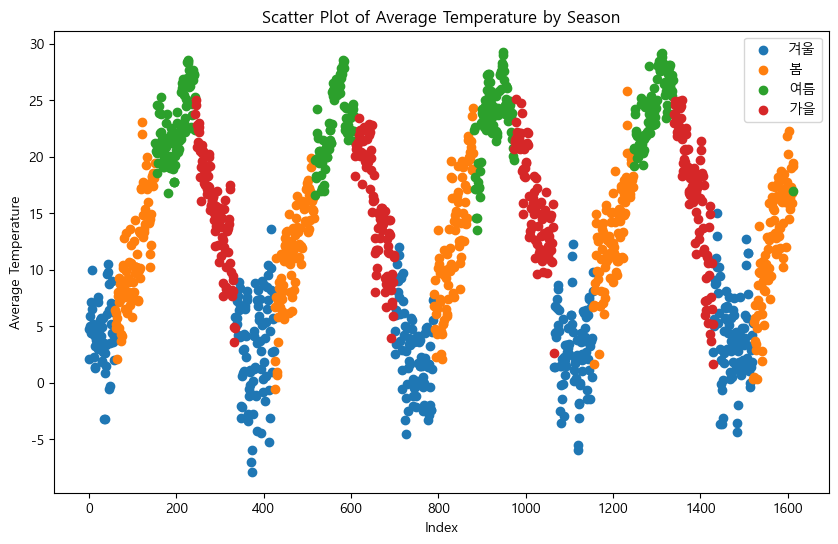

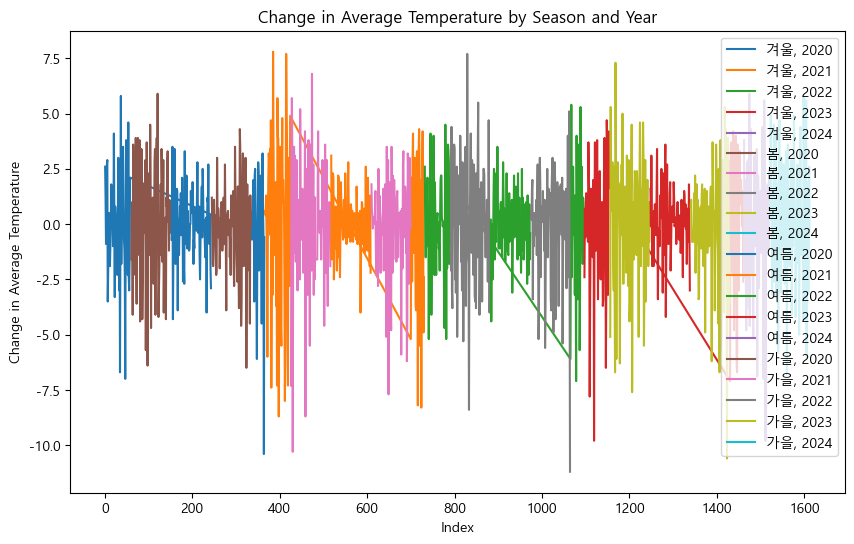

,tm,stnNm,sumRn,stnId,avgTa,year,month,day,day_of_week,bigo,avgTa_change
0,2020-01-01,울릉도,NaN,115,2.1,2020,1,1,Wednesday,겨울,NaN
1,2020-01-02,울릉도,NaN,115,4.7,2020,1,2,Thursday,겨울,2.6
2,2020-01-03,울릉도,NaN,115,5.9,2020,1,3,Friday,겨울,1.2
3,2020-01-04,울릉도,1.5,115,5.0,2020,1,4,Saturday,겨울,-0.9
4,2020-01-05,울릉도,4.7,115,4.4,2020,1,5,Sunday,겨울,-0.6
...,...,...,...,...,...,...,...,...,...,...,...
1609,2024-05-28,울릉도,NaN,115,15.9,2024,5,28,Tuesday,봄,-3.1
1610,2024-05-29,울릉도,NaN,115,16.8,2024,5,29,Wednesday,봄,0.9
1611,2024-05-30,울릉도,NaN,115,19.4,2024,5,30,Thursday,봄,2.6
1612,2024-05-31,울릉도,NaN,115,19.2,2024,5,31,Friday,봄,-0.2


In [5]:
# 그래프 한글 표시 깨짐 현상 해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#############################################################################################################
## 2. tm을 이용해서 년, 월, 일, 요일 변수를 작성하고

## '기상'테이블에서 tm, stnNm, sumRn, stnId, avgTa 항목만 불러옴
query = '''
    SELECT tm, stnNm, sumRn, stnId, avgTa
    FROM 기상
'''

import sqlite3
import pandas as pd

connection = sqlite3.connect("날씨.db")   ## 날씨.db와 연결을 맺고
df = pd.read_sql(query, connection, index_col=None)  ## df로 불러옴

# Convert 'tm' column to datetime data type
df['tm'] = pd.to_datetime(df['tm'])    ## tm의 type을 datetime data type으로 바꿔줌

#############################################################################################################
## 3. df['bigo']=월이 12,1,2 일 때는 '겨울', 3,4,5 일 때는 '봄', 6,7,8은 '여름', 9,10,11은 '가을'
# Extract year, month, day, and day of the week
df['year'] = df['tm'].dt.year                           ##새로운 df를 만들어줌
df['month'] = df['tm'].dt.month
df['day'] = df['tm'].dt.day
df['day_of_week'] = df['tm'].dt.day_name()    

# Define a function to map month numbers to seasons
def get_season(month):   
    if month in [12, 1, 2]:
        return '겨울'
    elif month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return None  # Return None for invalid months

# Apply the function to create the 'bigo' column
df['bigo'] = df['month'].apply(get_season)         ## 새로운 df bigo를 만들어줌!

# Display the DataFrame with the new 'bigo' column
# display(df)


#############################################################################################################
## 4. avgTa를 숫자로 변경 <- 산점도 표현 위해
df['avgTa'] = pd.to_numeric(df['avgTa'])
# display(df)


#############################################################################################################
## 5. sumRn을 숫자로 변경 
df['sumRn'] = pd.to_numeric(df['sumRn'])
# display(df)


#############################################################################################################
## 6. avgTa를 산점도로 표현, bigo 별로
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))     ## 산점도의 크기 정해주기
for season in df['bigo'].unique():
    plt.scatter(df[df['bigo'] == season].index, df[df['bigo'] == season]['avgTa'], label=season)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot of Average Temperature by Season')
plt.legend()

# Show the plot
# plt.show()


#############################################################################################################
## 7. avgTa값의 변화량을 꺾은선 차트로 표현, bigo별로, 년단위로 구별
df['year'] = df['tm'].dt.year

# Calculate change in 'avgTa' values
df['avgTa_change'] = df.groupby(['bigo', 'year'])['avgTa'].diff()

# Plot the data
plt.figure(figsize=(10, 6))
for season in df['bigo'].unique():
    for year in df['year'].unique():
        temp_df = df[(df['bigo'] == season) & (df['year'] == year)]
        plt.plot(temp_df.index, temp_df['avgTa_change'], label=f"{season}, {year}")

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Change in Average Temperature')
plt.title('Change in Average Temperature by Season and Year')
plt.legend()

# Show the plot
# plt.show()


#############################################################################################################
## 8. 온도가 높으면 강수량이 많아지는가? => 상관계수
correlation_coefficient = df['avgTa'].corr(df['sumRn'])

print("Correlation Coefficient:", correlation_coefficient)


#############################################################################################################
## 9. 년도가 올라갈수록 온도가 높아지는가? => 상관계수
correlation_coefficient = df['year'].corr(df['avgTa'])

print("Correlation Coefficient:", correlation_coefficient)
plt.show()

display(df)